http://mp3montaignebdx.legtux.org/Cours/Cours_electrocinetique/
http://mp3montaignebdx.legtux.org/Cours/Cours_electrocinetique/Traitement_numerique_signaux.pdf
http://mp3montaignebdx.legtux.org/Cours/Cours_electrocinetique/Filtrage_numerique_version_2_boucles.py


https://perso.esiee.fr/~bercherj/Python/DistribsTP/distrib_filt_elem/Corrigé_TP_Filtrage_elem.html


http://www.f-legrand.fr/scidoc/docimg/sciphys/electro/filtrespb/filtrespb.html
http://www.f-legrand.fr/scidoc/docmml/numerique/filtre/filtrenum/filtrenum.html


http://people.rennes.inria.fr/Olivier.Sentieys/teach/filtragepourlesnuls.pdf
https://homepages.laas.fr/adoncesc/SystemEmbed/Filtrage.pdf
https://www.unilim.fr/pages_perso/vahid/filter/cours_digital.pdf

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
https://docs.scipy.org/doc/scipy/reference/signal.html

[0.00041655 0.00124964 0.00124964 0.00041655] [ 1.         -2.6861574   2.41965511 -0.73016535]


/usr/local/lib/python3.5/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


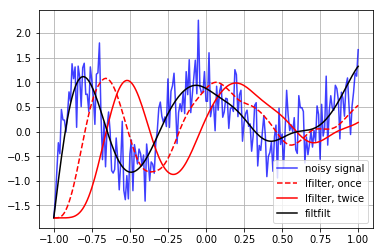

In [2]:
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1*np.sin(2*np.pi*1.25*t + 1) +
     0.18*np.cos(2*np.pi*3.85*t))
xn = x + np.random.randn(len(t)) * 0.5

#Create an order 3 lowpass butterworth filter:
b, a = signal.butter(3, 0.05)
print(b,a)
#Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

#Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

#Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, xn)

#Plot the original signal and the various filtered versions:
plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

In [3]:
from ANEMO import ANEMO

In [4]:
import pickle
with open('result/param_Fit_AM_fct_velocity_2_step_False_whitening.pkl', 'rb') as fichier :
    param = pickle.load(fichier, encoding='latin1')
with open('../demo/data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [5]:
Plot = ANEMO.Plot(exp)

In [6]:
def figure(N_trial, N_block=1,bruit=8, plot='') :

    nb_trial = N_trial*N_block
    
    x = np.arange(0,1500,1)
    TargetOn, StimulusOf = 750, 750-300
    np.random.seed(7)
    
    fig, axs = plt.subplots(nb_trial, 1, figsize=(10, nb_trial*(10*1/2)/1.6180))
        
    
    
    for block in range(N_block) :
        
        for trial in range(N_trial) :
            
            dir_target = exp['p'][trial][block][0]*2-1
            
            test = ANEMO.Equation.fct_velocity(x, dir_target,
                                               param['start_anti'][block][trial]+TargetOn,
                                               param['v_anti'][block][trial],
                                               param['latence'][block][trial]+TargetOn,
                                               param['tau'][block][trial],
                                               param['maxi'][block][trial],
                                               do_whitening=False)
            
            
            test = test + np.random.rand(len(x))*bruit
            test = test-np.random.rand(len(x))*bruit

            if nb_trial==1 : ax = axs
            else : ax = axs[trial]

            
            ax.plot(np.arange(-750,750), test, c='k', alpha=0.5)
            
            ax = Plot.deco(ax, StimulusOn=0, StimulusOf=StimulusOf,
                           TargetOn=TargetOn, TargetOff=1400, t_label=10, saccades=[])
            ax.set_ylabel('Velocity (°/s)', fontsize=10)
            ax.set_title('block %s, trial %s'%(block, trial))

            # Filtre moyenneur
            #-----------------------------------------------------------
            # Filtre g qui calcule la moyenne sur une période de 40 points
            L=10
            g=np.ones(L)/L
            m_estimee=signal.lfilter(g,1,test)
            ax.plot(np.arange(-750,750), m_estimee, c='r')
            '''# On vérifie quelle est l'allure de G(f)
            G=fftshift(fft(g,1000))
            figure(4)
            plot(freq(1000),abs(G))
            xlim([-0.5, 0.5])
            xlabel('Fréquences (réduites)')
            title('Fonction de transfert du filtre moyenneur')
            '''
            
            
            #Donnees numeriques 
            Te=100 #Période d'échantillonnage
            wc=2*np.pi*0.01 #Pulsation de coupure des passe-bas et passe-haut
            
            spb1, sph1 = np.zeros(len(test)), np.zeros(len(test))
            #Ecriture des signaux de sortie des filtres par récurrence
            for k in range(len(test)-1):
                spb1[k+1]=((2-wc*Te)/(2+wc*Te))*spb1[k]+((wc*Te)/(2+wc*Te))*(test[k]+test[k+1]) #récurrence du passe-bas
                sph1[k+1]=((2-wc*Te)/(2+wc*Te))*sph1[k]+(2/(2+wc*Te))*(test[k+1]-test[k])  #récurrence du passe-haut



            ax.plot(np.arange(-750,750), spb1, c='c')
            ax.plot(np.arange(-750,750), sph1, c='g', alpha=0.5)
            
            
            plt.tight_layout()

/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


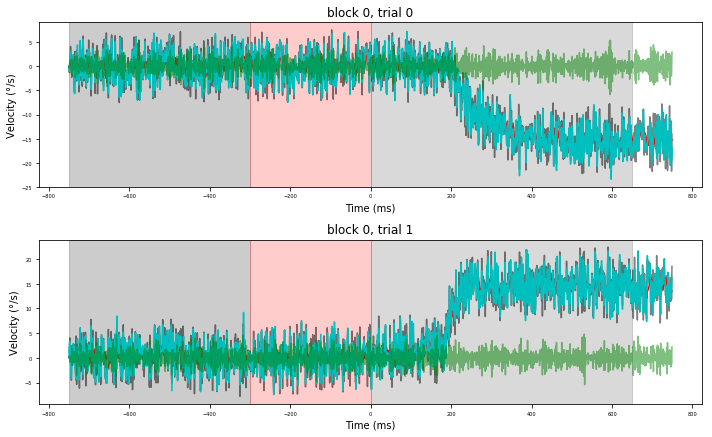

In [7]:
figure(2, N_block=1,bruit=8, plot='')